# Handleiding
Ik installeerde cartopy met:  
```$ conda install -c conda-forge cartopy```

Helaas zaten er fouten in de code omdat python 3.8 nog niet ondersteund wordt...

# Mocht het fout gaan, dan moet je een nieuwe environment aanmaken met python 3.7



# Nieuwe environment:

Om een nieuwe environment en packages te maken, gebruikte ik:
```$ conda create -n cartopy -c conda-forge python=3.7 cartopy matplotlib ipykernel```

Vervolgens moet de i
```$ python -m ipykernel install --user --name cartopy_env```

Tot slot nog jupyter opnieuw starten en dan kan de kernel worden gewijzigd in het menu

In [1]:
import cartopy.crs as ccrs
import cartopy.mpl as cmpl
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
%matplotlib inline

# Kijk voor de voorbeelden naar:
https://scitools.org.uk/cartopy/docs/v0.15/gallery.html#web-services

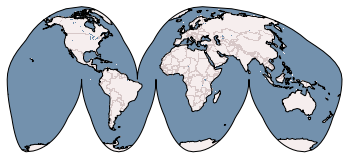

In [2]:
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()

ax.add_wms(wms='http://vmap0.tiles.osgeo.org/wms/vmap0',
           layers=['basic'])

plt.show()

# Het inlezen van de juiste projectie van het Rijksdriehoekstelsel
Rijksdriehoek code --> **EPSG:28922**

In [3]:
crs = ccrs.epsg(28992)
crs

_EPSGProjection(28992)

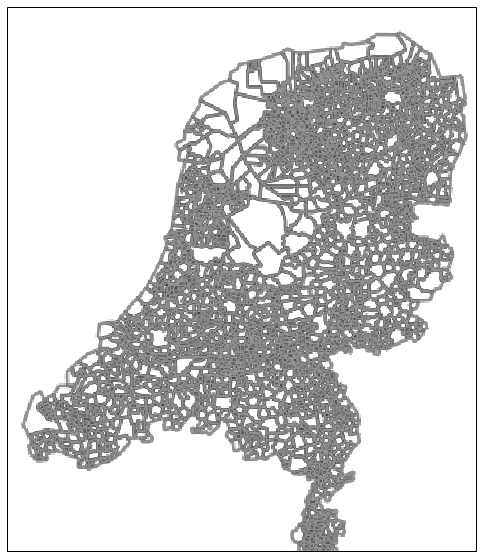

In [4]:
ax = plt.axes(projection=crs)
ax.add_wms(wms='http://geodata.nationaalgeoregister.nl/bag/wms?srs=EPSG:28992&',
           layers=['woonplaats'])
ax.figure.set_size_inches(12, 10)

# AHN2 voorbeeld

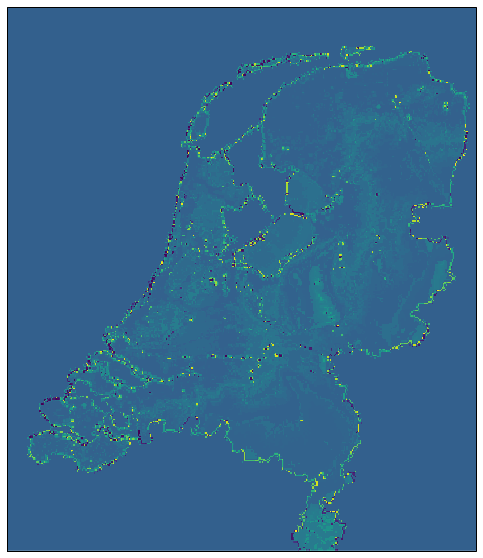

In [5]:
ax = plt.axes(projection=crs)
ax.add_wms(wms='http://geodata.nationaalgeoregister.nl/ahn2/wms?',
           layers=['ahn2_5m'])
ax.figure.set_size_inches(12, 10)

# Kleuren worden raar weergegeven
Dat komt volgens mij doordat de WMS niet de hoogte waarden verstuurd, maar de cmap waarde van 0-256, en deze is niet lineair maar zeer niet-lineair

# Tot slot nog een uitgebreid voorbeeld

Text(0.5, 1.0, 'AHN2 over Zeeland, kleurenschaal verkeerd')

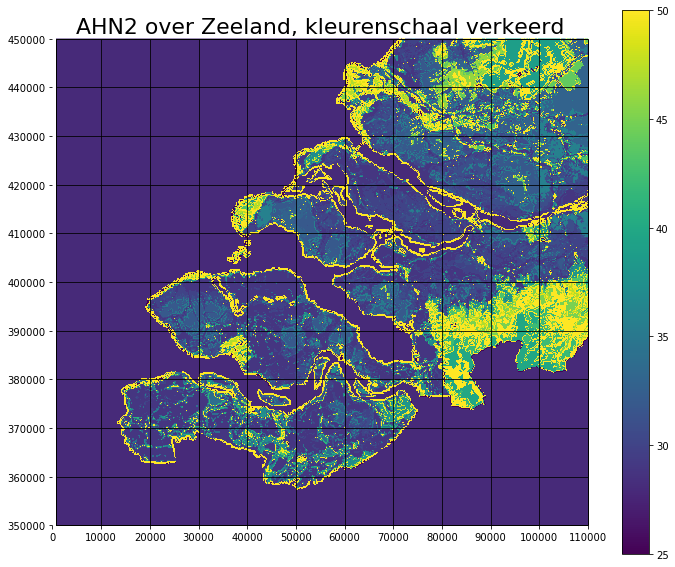

In [11]:
ax = plt.axes(projection=crs)
ax.figure.set_size_inches(12, 10)
ax.set_xlim((0, 100000))
ax.set_ylim((350000, 450000))
m = ax.add_wms(wms='http://geodata.nationaalgeoregister.nl/ahn2/wms?',
           layers=['ahn2_5m'],
           wms_kwargs=dict(crs='EPSG:28992',
                           dpiMode='70'),
          cmap='viridis', norm=colors.Normalize(vmin=25, vmax=50, clip=True))
plt.colorbar(m)
#cmpl.gridliner.Gridliner(axes=ax, crs=crs, xlocator=ticker.IndexLocator(10000, 0))
ax.gridlines(axes=ax, crs=crs,
             xlocs=ticker.FixedLocator(range(0, 120000, 10000)),
             ylocs=ticker.FixedLocator(range(350000, 460000, 10000)),
             color='k')
ax.set_xticks(range(0, 120000, 10000), crs=crs)
ax.set_yticks(range(350000, 460000, 10000), crs=crs)
plt.title('AHN2 over Zeeland, kleurenschaal verkeerd', fontdict={'FontSize': 22})